In [6]:
#muss man halt einmal runterladen: https://github.com/openskynetwork/opensky-api
#pip install -e /Users/jonaspieper/Documents/GitHub/opensky-api/python

Obtaining file:///Users/jonaspieper/Documents/GitHub/opensky-api/python
  Preparing metadata (setup.py) ... done
  Running setup.py develop for opensky-api
Note: you may need to restart the kernel to use updated packages.


In [3]:
#from opensky_api import OpenSkyApi
import pandas as pd
#from geopy.geocoders import Nominatim
import requests
#import json

# OpenSkyApi

[Limitations](https://github.com/openskynetwork/opensky-api/blob/master/docs/free/rest.rst#id5)

In [55]:
#call opensky network api as unnkown users
response = requests.get("https://opensky-network.org/api/states/all").json()

## Save as json

In [81]:
# Save as .json with timestamp as name
with open(f'{response["time"]}.json', 'w', encoding='utf-8') as f:
    json.dump(response, f, ensure_ascii=False, indent=4)

In [82]:
# Open json
with open('1652785860.json') as f:
    test = json.load(f)

## Turn into DataFrame and filter for flight from commercial airlines

In [84]:
flights_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,4b1814,SWR1742,Switzerland,1.652786e+09,1652785859,10.1742,42.7007,11277.60,False,257.77,154.97,-0.33,None,11658.60,1000,False,0,0
1,4b1816,SWR101C,Switzerland,1.652786e+09,1652785859,8.4964,47.4620,1158.24,False,76.64,276.55,13.98,None,1303.02,1000,False,0,0
2,7c6b2f,JST825,Australia,1.652786e+09,1652785860,152.7774,-28.4210,7711.44,False,224.50,201.51,10.08,None,8069.58,None,False,0,0
3,7c6b2d,JST712,Australia,1.652786e+09,1652785859,146.9922,-41.1352,11521.44,False,202.81,337.79,7.80,None,11376.66,3762,False,0,1
4,4b1812,SWR167M,Switzerland,1.652786e+09,1652785859,9.3810,48.6905,10805.16,False,210.79,10.40,6.50,None,11148.06,3042,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5784,710dbc,KNE308,Saudi Arabia,1.652786e+09,1652785860,16.7209,45.6714,11894.82,False,236.35,132.27,0.00,None,12176.76,7104,False,0,0
5785,4caa32,ITY614,Ireland,1.652786e+09,1652785859,-14.6934,52.8661,11178.54,False,262.19,306.06,1.95,None,11079.48,4040,False,0,6
5786,a9607d,JBU329,United States,1.652786e+09,1652785860,-79.3692,36.7145,10363.20,False,215.97,216.38,0.33,None,10660.38,5343,False,0,4
5787,c067ae,ACA400,Canada,1.652786e+09,1652785855,-79.6201,43.6774,NaN,False,7.46,137.81,NaN,None,NaN,2252,False,0,0


In [91]:
flights_df = pd.DataFrame(response["states"]).loc[:,:16]
col_names=['icao24','callsign','origin_country','time_position','last_contact','long','lat','baro_altitude','on_ground','velocity',       
'true_track','vertical_rate','sensors','geo_altitude','squawk','spi','position_source']
flights_df.columns = col_names

In [107]:
flights_df.head(5)

,icao24,callsign,origin_country,time_position,last_contact,long,lat,baro_altitude,on_ground,velocity,true_track,vertical_rate,sensors,geo_altitude,squawk,spi,position_source
0,4b1814,SWR1742,Switzerland,1.652787e+09,1652787428,12.1478,39.4023,7703.82,False,242.31,156.21,-10.40,None,8420.10,1000,False,0
1,e49406,GLO1288,Brazil,1.652787e+09,1652787439,-46.0509,-23.2422,5181.60,False,180.70,10.83,0.00,None,5334.00,None,False,0
2,4b1816,SWR101C,Switzerland,1.652787e+09,1652787440,9.3290,49.8667,10363.20,False,205.30,337.61,-0.33,None,10690.86,1000,False,0
3,7c6b2f,JST825,Australia,1.652787e+09,1652787440,151.4894,-31.2249,10355.58,False,215.71,202.28,0.00,None,10690.86,1020,False,0
4,7c6b2d,JST712,Australia,1.652787e+09,1652787440,145.6546,-38.5350,7178.04,False,176.55,338.82,-10.73,None,7200.90,3762,False,0


In [286]:
# Store as .csv
#flights_df.to_csv("../raw_data/flights_raw.csv")

## Airlines and callsigns

In [1]:
wikiurl = "https://de.wikipedia.org/wiki/Liste_von_Fluggesellschaften"

In [6]:
carriers_df = pd.DataFrame(pd.read_html(wikiurl, keep_default_na=False)[1])
carriers_df.head()

,Name,IATA,ICAO,Rufzeichen,Herkunftsland,Luftfahrtallianz,Bemerkung
0,ABC Air Hungary,–,AHU,ABC HUNGARY,Ungarn,,T
1,Abelag Aviation,W9,AAB,ABG,Belgien,,C (Business- u. Ambulanzflüge)
2,ABS Jets,–,ABP,BAIR,Tschechien,,P
3,Abu Dhabi Aviation,–,AXU,–,VAE,,C
4,ABX Air,GB,ABX,ABEX,USA,,T+


B: Billigfluggesellschaft<br>
C: Charterfluggesellschaft<br>
P: Passagierfluggesellschaft mit Linienflügen und ggf. einigen Charterflügen<br>
P+: Passagier- und Charterfluggesellschaft<br>
R: führt Regierungsflüge durch<br>
S: Sonstige Flüge, wie z. B. medizinische Dienste oder Nostalgieflüge<br>
T: Transportfluggesellschaft<br>
T+: Transport- und Charterfluggesellschaft<br>
U: Universal; Passagier sowie Fracht<br>
U+: Charter-, Passagier- und Transportfluggesellschaft<br>
Wenn eine genaue Einordnung nicht möglich ist → P<br>

ICAO Code == first three letters of callsign 

In [108]:
carriers_df.Bemerkung.value_counts()

P                                                     385
C                                                      86
B                                                      67
T                                                      61
P+                                                     56
U                                                      32
T+                                                     20
U+                                                     12
S                                                       4
R                                                       3
B/C                                                     2
P/R                                                     2
C/R                                                     2
T+ (auch Ambulanzflüge)                                 2
C/S/T                                                   1
Airtaxi                                                 1
Übungsflüge                                             1
S (Nostalgiefl

In [109]:
# Filter wikipedia table for passenger carriers
car_types = ["B", "C", "P", "P+", "U", "U+"]

In [114]:
p_carriers = carriers_df[carriers_df["Bemerkung"].isin(car_types)]

In [116]:
p_carriers.ICAO

2      ABP
3      AXU
5      BVR
7      AEE
8      REA
      ... 
746    ANR
747    IYE
748      –
749    IZG
750    TAN
Name: ICAO, Length: 638, dtype: object

In [162]:
# Filter flights only to include passenger flights
pflights_df = flights_df[flights_df.callsign.str[:3].isin(p_carriers.ICAO)].copy()
pflights_df

,icao24,callsign,origin_country,time_position,last_contact,long,lat,baro_altitude,on_ground,velocity,true_track,vertical_rate,sensors,geo_altitude,squawk,spi,position_source
0,4b1814,SWR1742,Switzerland,1.652787e+09,1652787428,12.1478,39.4023,7703.82,False,242.31,156.21,-10.40,None,8420.10,1000,False,0
1,e49406,GLO1288,Brazil,1.652787e+09,1652787439,-46.0509,-23.2422,5181.60,False,180.70,10.83,0.00,None,5334.00,None,False,0
2,4b1816,SWR101C,Switzerland,1.652787e+09,1652787440,9.3290,49.8667,10363.20,False,205.30,337.61,-0.33,None,10690.86,1000,False,0
3,7c6b2f,JST825,Australia,1.652787e+09,1652787440,151.4894,-31.2249,10355.58,False,215.71,202.28,0.00,None,10690.86,1020,False,0
4,7c6b2d,JST712,Australia,1.652787e+09,1652787440,145.6546,-38.5350,7178.04,False,176.55,338.82,-10.73,None,7200.90,3762,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6232,4b1900,,Switzerland,NaN,1652787427,NaN,NaN,NaN,False,267.07,79.23,0.00,None,NaN,None,False,0
6233,4b1901,EDW3A,Switzerland,1.652787e+09,1652787440,-12.8410,53.6476,11887.20,False,228.25,106.23,0.00,None,11879.58,None,False,0
6235,a9607d,JBU329,United States,1.652787e+09,1652787384,-80.8710,33.9732,10363.20,False,221.96,199.78,0.00,None,10736.58,5343,False,0
6236,c067ae,ACA400,Canada,1.652787e+09,1652787440,-77.2889,44.1448,10058.40,False,225.46,57.11,0.00,None,9928.86,2252,False,0


In [163]:
pflights_df["callsign_carrier"] = pflights_df["callsign"].str[:3]

In [164]:
p_carriers

,Name,IATA,ICAO,Rufzeichen,Herkunftsland,Luftfahrtallianz,Bemerkung
2,ABS Jets,–,ABP,BAIR,Tschechien,,P
3,Abu Dhabi Aviation,–,AXU,–,VAE,,C
5,ACM Air Charter,–,BVR,BAVARIAN,Deutschland,AirClub,C
7,Aegean Airlines,A3,AEE,AEGEAN,Griechenland,Star Alliance,P
8,Aer Arann Islands,RE,REA,AER ARANN,Irland,,P+
...,...,...,...,...,...,...,...
746,Yanair,YE,ANR,YANAIR,Ukraine,keine,P
747,Yemenia,IY,IYE,Yemeni,Jemen,keine,P
748,Yeti Airlines,YA,–,–,Nepal,keine,U+
749,Zagros Airlines,–,IZG,ZAGROS,Iran,keine,P


In [166]:
# merge carrier to df
pflights_df = pflights_df.merge(p_carriers[["Name", "ICAO"]], left_on="callsign_carrier", right_on="ICAO", how="left")
pflights_df.rename(columns = {'Name':'carrier_company', "ICAO":"icao"}, inplace = True)
pflights_df.head()

,icao24,callsign,origin_country,time_position,last_contact,long,lat,baro_altitude,on_ground,velocity,...,sensors,geo_altitude,squawk,spi,position_source,callsign_carrier,carrier_company,icao,carrier_company,icao
0,4b1814,SWR1742,Switzerland,1.652787e+09,1652787428,12.1478,39.4023,7703.82,False,242.31,...,None,8420.10,1000,False,0,SWR,Swiss,SWR,Swiss,SWR
1,e49406,GLO1288,Brazil,1.652787e+09,1652787439,-46.0509,-23.2422,5181.60,False,180.70,...,None,5334.00,None,False,0,GLO,Gol Linhas Aéreas,GLO,Gol Linhas Aéreas,GLO
2,4b1816,SWR101C,Switzerland,1.652787e+09,1652787440,9.3290,49.8667,10363.20,False,205.30,...,None,10690.86,1000,False,0,SWR,Swiss,SWR,Swiss,SWR
3,7c6b2f,JST825,Australia,1.652787e+09,1652787440,151.4894,-31.2249,10355.58,False,215.71,...,None,10690.86,1020,False,0,JST,Jetstar Airways,JST,Jetstar Airways,JST
4,7c6b2d,JST712,Australia,1.652787e+09,1652787440,145.6546,-38.5350,7178.04,False,176.55,...,None,7200.90,3762,False,0,JST,Jetstar Airways,JST,Jetstar Airways,JST


In [130]:
# Check validity of on_ground against altitude
pflights_df[(pflights_df.on_ground==True)& (pflights_df.baro_altitude>1000)]

,icao24,callsign,origin_country,time_position,last_contact,long,lat,baro_altitude,on_ground,velocity,true_track,vertical_rate,sensors,geo_altitude,squawk,spi,position_source
2041,4baa8a,THY9WM,Turkey,1.652787e+09,1652787441,14.6591,51.0408,9151.62,True,197.03,342.37,-10.4,None,9334.5,3205,False,0


In [131]:
# Check validity of on_ground against altitude
pflights_df[(pflights_df.on_ground==True)& (pflights_df.geo_altitude>1000)]

,icao24,callsign,origin_country,time_position,last_contact,long,lat,baro_altitude,on_ground,velocity,true_track,vertical_rate,sensors,geo_altitude,squawk,spi,position_source
2041,4baa8a,THY9WM,Turkey,1.652787e+09,1652787441,14.6591,51.0408,9151.62,True,197.03,342.37,-10.4,None,9334.5,3205,False,0


In [285]:
# Store as .csv
#pflights_df.to_csv("../raw_data/pflights.csv")

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

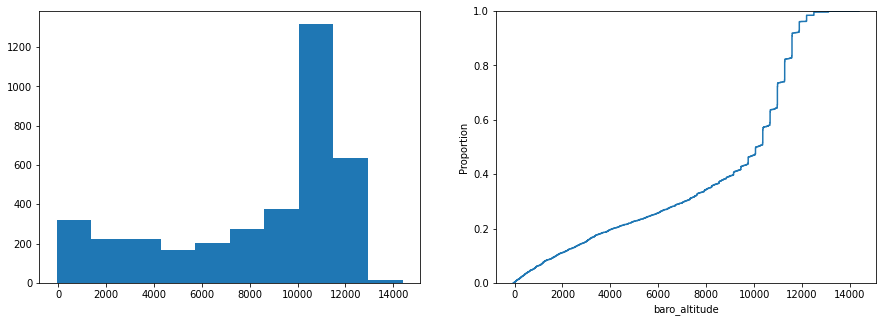

In [146]:
# Check distribution of baro_altitude
fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].hist(pflights_df.baro_altitude)
sns.ecdfplot(pflights_df.baro_altitude, ax=axs[1]);

## Aircraft types

This is a list of potential datasources of Aircraft registers, we will use the openskyDB
- [List](https://www.caa.co.uk/aircraft-register/g-info/other-data-sources/)
- [This one would solve a lot of our problems, but unfortunately it is not available](http://www.airframes.org/)
- https://opensky-network.org/datasets/metadata/
- https://zenodo.org/record/3974209

### OpenSky-Network DB
https://opensky-network.org/datasets/metadata/

In [3]:
# Load Database from OpenSky (I downloaded it from their website, but it gets currently updated)
opensky_DB = pd.read_csv("../raw_data/aircraftDatabase.csv")

Index(['icao24', 'registration', 'manufacturericao', 'manufacturername',
       'model', 'typecode', 'serialnumber', 'linenumber', 'icaoaircrafttype',
       'operator', 'operatorcallsign', 'operatoricao', 'operatoriata', 'owner',
       'testreg', 'registered', 'reguntil', 'status', 'built',
       'firstflightdate', 'seatconfiguration', 'engines', 'modes', 'adsb',
       'acars', 'notes', 'categoryDescription'],
      dtype='object')

In [4]:
opensky_DB.columns

Index(['icao24', 'registration', 'manufacturericao', 'manufacturername',
       'model', 'typecode', 'serialnumber', 'linenumber', 'icaoaircrafttype',
       'operator', 'operatorcallsign', 'operatoricao', 'operatoriata', 'owner',
       'testreg', 'registered', 'reguntil', 'status', 'built',
       'firstflightdate', 'seatconfiguration', 'engines', 'modes', 'adsb',
       'acars', 'notes', 'categoryDescription'],
      dtype='object')

In [13]:
opensky_DB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470000 entries, 0 to 469999
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   icao24               469999 non-null  object 
 1   registration         432135 non-null  object 
 2   manufacturericao     149726 non-null  object 
 3   manufacturername     429636 non-null  object 
 4   model                431710 non-null  object 
 5   typecode             177285 non-null  object 
 6   serialnumber         428055 non-null  object 
 7   linenumber           967 non-null     object 
 8   icaoaircrafttype     149601 non-null  object 
 9   operator             23685 non-null   object 
 10  operatorcallsign     40610 non-null   object 
 11  operatoricao         41978 non-null   object 
 12  operatoriata         7758 non-null    object 
 13  owner                427165 non-null  object 
 14  testreg              297 non-null     object 
 15  registered       

In [190]:
# Merge pflights df with openskyDB on "icao24"
pflights = pflights.merge(opensky_DB[['icao24', 'registration', 'manufacturericao', 'manufacturername',
       'model', 'typecode', 'serialnumber', 'linenumber', 'icaoaircrafttype',
       'operator', 'operatorcallsign', 'operatoricao', 'operatoriata', 'owner']], on="icao24", how="left")

In [17]:
# ~700 aircrafts are not listed in the DB 
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4793 entries, 0 to 4792
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4793 non-null   int64  
 1   icao24             4793 non-null   object 
 2   callsign           4321 non-null   object 
 3   origin_country     4773 non-null   object 
 4   time_position      4682 non-null   float64
 5   last_contact       4793 non-null   int64  
 6   long               4682 non-null   float64
 7   lat                4682 non-null   float64
 8   baro_altitude      4269 non-null   float64
 9   on_ground          4793 non-null   bool   
 10  velocity           4793 non-null   float64
 11  true_track         4793 non-null   float64
 12  vertical_rate      4383 non-null   float64
 13  sensors            0 non-null      float64
 14  geo_altitude       4289 non-null   float64
 15  squawk             2904 non-null   float64
 16  spi                4793 

In [20]:
# "Model" column shows aircraft type
pflights.model

0       A320-271N
1             NaN
2             NaN
3        A320 232
4        A320 232
          ...    
4788     A340-313
4789     A340-313
4790     A320-232
4791     A220-300
4792     A321-211
Name: model, Length: 4793, dtype: object

### US Aircrafts

[US Aircraft registration DB](https://www.faa.gov/licenses_certificates/aircraft_certification/aircraft_registry/releasable_aircraft_download/)
<br>
The US Aircraft register contains a lot of information about each aircraft which is registered in the US. Like aircraft model and the number of seats. Unfortunately it is only available for US flights. Other countries only offer webinterfaces. 

In [255]:
# Load data (I downloaded it to my machine first)
acftref = pd.read_csv("/Users/philippheitmann/Downloads/ReleasableAircraft/ACFTREF.txt")
mastr = pd.read_csv("/Users/philippheitmann/Downloads/ReleasableAircraft/MASTER.txt")

/Users/philippheitmann/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [256]:
# Columns to keep
col = ["MODE S CODE HEX", "MODE S CODE", "TYPE AIRCRAFT", 'CODE', "NAME", 'MFR', 'MODEL', 'TYPE-ACFT', 'NO-SEATS']

# Merge two tables
aircraft_US = mastr.merge(acftref, left_on="MFR MDL CODE", right_on="CODE")[col].copy()

In [278]:
# strip whitespace
cols = aircraft_US.select_dtypes(object).columns
aircraft_US[cols] = aircraft_US[cols].apply(lambda x: x.str.strip())

In [279]:
# Create column to merge on (lowercase)
aircraft_US["icao24"] = aircraft_US["MODE S CODE HEX"].str.lower()

In [282]:
# Merge dataframes to get Aircraft model and no of seats for american registered airlines 
us_pflights = pflights_df.merge(aircraft_US, on="icao24", how="inner")

In [284]:
# Store as .csv
#us_pflights.to_csv("../raw_data/us_pflights.csv")

## Convert time into datetime

In [289]:
from datetime import datetime

In [287]:
# Timestamp in Unix since epoch
response["time"]

1652787441

In [290]:
# Unix time as datetime
datetime.fromtimestamp(response["time"])

datetime.datetime(2022, 5, 17, 13, 37, 21)

## Address based on lat & long

### `Reverse-geocoder`

In [116]:
#!pip install reverse_geocoder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.0 MB/s eta 0:00:0000:01:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for reverse_geocoder: filename=reverse_geocoder-1.5.1-py3-none-any.whl size=2268088 sha256=36344d9f554c9539ee4ed90037bece871d328273b71f1efc00564adf28585493
  Stored in directory: /Users/philippheitmann/Library/Caches/pip/wheels/65/42/5e/223fcd5dc869ff98d5ee6b19e236f82828e4e3c039328ebe20
Successfully built reverse_geocoder
You should consider upgrading via the '/Users/philippheitmann/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8 -m pip install --upgrade pip' command.


In [119]:
# import and test package
import reverse_geocoder
coordinates = (-37.81, 144.96)#, (31.76, 35.21)
reverse_geocoder.search(coordinates)

[{'lat': '-37.814',
  'lon': '144.96332',
  'name': 'Melbourne',
  'admin1': 'Victoria',
  'admin2': 'Melbourne',
  'cc': 'AU'}]

In [157]:
# filter df for for flights which are on ground and do not have any nan values in lat and long
on_ground = pflights.dropna(subset=['lat', "long"]).loc[pflights.on_ground==True].reset_index(drop=True)

In [160]:
# create coord column with the required format for the reverse_geocoder
on_ground["coord"]= [(lat, long) for lat, long in zip(on_ground["lat"], on_ground["long"])]

In [163]:
# Not a good way to do it - takes forever ;) 
#on_ground["geolocation"] = on_ground.apply(lambda col: reverse_geocoder.search(col["coord"]), axis=1)

KeyboardInterrupt: 

In [164]:
# better way to get coordinates 
coordinates = on_ground.coord.tolist()
rev_geo = reverse_geocoder.search(coordinates)

In [174]:
# Concat Geo Data with old dataframe
on_ground_final = pd.concat([on_ground, pd.DataFrame(rev_geo)], axis=1)

In [189]:
on_ground_final.columns

Index(['icao24', 'callsign', 'origin_country', 'time_position', 'last_contact',
       'long', 'lat', 'baro_altitude', 'on_ground', 'velocity', 'true_track',
       'vertical_rate', 'sensors', 'geo_altitude', 'squawk', 'spi',
       'position_source', 'callsign_carrier', 'carrier_company', 'icao',
       'carrier_company.1', 'icao.1', 'coord', 'lat', 'lon', 'name', 'admin1',
       'admin2', 'cc'],
      dtype='object')

### Geolocator - Find address based on lat & long (Not free - Will not be used) 

In [179]:
# geolocator = Nominatim(user_agent="geoapiExercises")

In [180]:
# landing["lat_long"]=landing['lat'].astype("string")+","+landing['long'].astype("string")

In [181]:
# landing["address"] = landing.apply(lambda col: geolocator.reverse(col["lat_long"], language="en-GB", addressdetails=False), axis=1)

In [182]:
# landing =  landing.dropna()

In [183]:
# landing["country"] = landing.apply(lambda col: col["address"][0].split(",")[-1], axis=1)

### Traffic tool? - Does not work for me 

In [22]:
# import matplotlib.pyplot as plt
# from traffic.data import opensky
# from traffic.drawing import EuroPP, countries
# sv = opensky.api_states()
# df = sv.data.head
# print(df)

ModuleNotFoundError: No module named 'traffic'